<a href="https://colab.research.google.com/github/KiboSennin/ADA-Informes-/blob/main/RadixSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Descripcion del problema 

Para la aplicacion de Redix sort necesitamos un problema de ordenamiento de números.


Como entrada necesitamos un arreglo de tipo A[a1, a2, a3, a4, a5,...., an]

y como salida queremos que este nos de el arreglo ordenado de forma tal que A[a1 < a2 < a3 < a4 <.....< an]



# 1.1) Funcionamiento del Radix Sort 

El radix sort funciona de forma tal que ordena desde los elementos menos relevantes hasta los mas relevantes.

Luego se aplica el counting sort para ordenar caso a caso como un sub-proceso 
este  sub-proceso

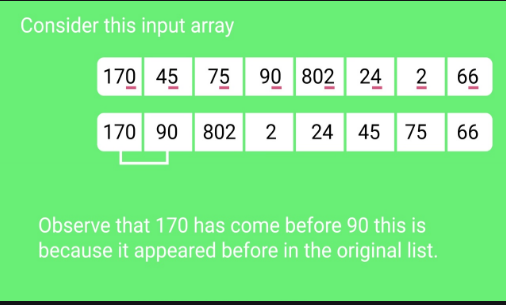

Se va verificando parte a parte descomponiendo el número dentro del arreglo de forma tal que primero se ven las unidades, luego las decenas y asi sucesivamente 

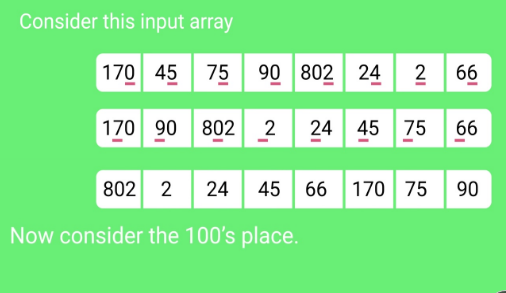

Despues de analizar las unidades los numeros se ordenan de menor a mayor por sus unidades, luego por las decenas y las centenas.

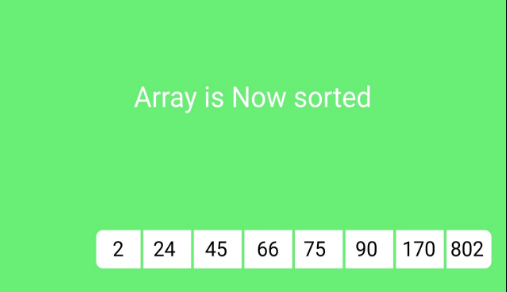

Asi finalmente el arreglo es ordenado.

# 2) Codigo 

## 2.1) Radix Sort

In [31]:
def radixSort(arr, verbose = False):
    max1 = max(arr)
    exp = 1
    while max1 / exp >= 1:
        if verbose==True: 
          counting_Sort(arr, exp,verbose=True)
        else: counting_Sort(arr, exp)
        exp *= 10
    return arr

## 2.2) Counting Sort

In [32]:
def counting_Sort(arr, exp1, verbose = False): 
    
    global pasada

    n = len(arr)
    output = [0] * (n)
    count = [0] * (10)
    pasada += 1

    if verbose==True and pasada==1:
      print("Ordenando las Unidades\n")
    if verbose==True and pasada==2:
      print("Ordenando las Decenas\n")
    if verbose==True and pasada==3: 
      print("Ordenando las Centenas\n")

    for i in range(0, n):
      index = arr[i] // exp1
      count[index % 10] += 1

    if verbose==True:
      print("Recuento de cada elemento actual:",count)    
 
    for i in range(1, 10):
      count[i] += count[i - 1]
    i = n - 1

    while i >= 0:
      index = arr[i] // exp1
      output[count[index % 10] - 1] = arr[i]
      count[index % 10] -= 1
      i -= 1
    i = 0

    if verbose==True: 
      print("Cambia los elementos del arreglo a su posicion en el arreglo de salida:",count)

    for i in range(0, len(arr)):
      arr[i] = output[i]

    if verbose==True: print("Se imprime el contenido final del Counting Sort:",arr,"\n")

In [35]:
arr = [69, 420, 500, 0, 5, 86, 10, 100, 45, 67, 63, 1, 88, 3, 7]

pasada = 0

print("ENTRADA: ", arr, "")
radixSort(arr)
print("SALIDA: ", arr, "")

ENTRADA:  [69, 420, 500, 0, 5, 86, 10, 100, 45, 67, 63, 1, 88, 3, 7] 
SALIDA:  [0, 1, 3, 5, 7, 10, 45, 63, 67, 69, 86, 88, 100, 420, 500] 


## 2.3) Ejecución paso a paso

In [37]:
arr = [69, 420, 500, 0, 5, 86, 10, 100, 45, 67, 63, 1, 88, 3, 7]
pasada = 0
print("ENTRADA: ", arr)
arr_ordenado = radixSort(arr, verbose = True)
print("")
print("SALIDA: ", arr_ordenado)

ENTRADA:  [69, 420, 500, 0, 5, 86, 10, 100, 45, 67, 63, 1, 88, 3, 7]
Ordenando las unidades

Recuento de cada elemento: [5, 1, 0, 2, 0, 2, 1, 2, 1, 1]
Cambia los elementos arr su posicion en el arreglo de salida: [0, 5, 6, 6, 8, 8, 10, 11, 13, 14]
Salida de countingSort: [420, 500, 0, 10, 100, 1, 63, 3, 5, 45, 86, 67, 7, 88, 69] 

Ordenando las decenas

Recuento de cada elemento: [7, 1, 1, 0, 1, 0, 3, 0, 2, 0]
Cambia los elementos arr su posicion en el arreglo de salida: [0, 7, 8, 9, 9, 10, 10, 13, 13, 15]
Salida de countingSort: [500, 0, 100, 1, 3, 5, 7, 10, 420, 45, 63, 67, 69, 86, 88] 

Ordenando las centenas

Recuento de cada elemento: [12, 1, 0, 0, 1, 1, 0, 0, 0, 0]
Cambia los elementos arr su posicion en el arreglo de salida: [0, 12, 13, 13, 13, 14, 15, 15, 15, 15]
Salida de countingSort: [0, 1, 3, 5, 7, 10, 45, 63, 67, 69, 86, 88, 100, 420, 500] 


SALIDA:  [0, 1, 3, 5, 7, 10, 45, 63, 67, 69, 86, 88, 100, 420, 500]


# 3) Correctitud



```
Counting Sort (A, B, K)
1. let C[0...k] es un nuevo arreglo
2. for i = 0 to k
3.    C[i] = 0  
4. for j = 1 to A.length
5.    C[A[j]] = C[A[j]] + 1
6.    C[i]  ---> ahora contiene los numeros de los elementos iguales a i
7. for i = 1 to k
8.    C[i] = C[i] + C[i] + C[i - 1]
9.    C[i]  ---> ahora contiene los elementos mas pequeños que i
10. for j = A,length downto 1
11.    B[C[A[j]]] = C[A[j]] - 1
12.    C[A[j]] = C[A[j]] - 1

```

## 3.1) Correctitud Counting Sort 

*En la primeras 3 linea inicializamos el arreglo C[] solo con "0", 
en el for de la linea 4 - 5 inspeccionamos los elementos del input y evaluamos si el valor del input es i entonces incrementamos C[i].*

*Despues de la linea 5 C[i] mantiene los numeros del input iguales a i para los enteros i = 0, 1, 2....k.*

*En la linea 7 - 8, se determina para los i = 0, 1, 2,....., k para cuantos elementos del input menores o iguales a i mientras se ejecuta la suma en el arreglo.*

*Finalmente para las lineas 10 - 12 en el for pone los elementos A[j] en el orden correcto en el output.*

*y esto es correcto por que dicho procedimiento al reemplazar en un arreglo A[1...8] elementos cumple con el codigo al rootearlo.*

## 3.2) Correctitud Radix Sort

***Lemma***:

*Dados los números de n digitos, en los que cada dígito puede tomar hasta k valores posibles, el Radix sort clasifica correctamente dichos números en θ(d(n  k)) si el tiempo es estable usa θ(n + k).*


***proof:***

La correctitud de Radix sort se sigue por inducion, en la columna donde empieza a ordenarse. El analisis del tiempo de ejecución deepende de la estabilidad del ordenamiento utilizado como algoritmo de clasificación intermedio. Cuando cada D-digito esta en el rango de 0 a k - 1, y k no es demasiado grande, el counting sort termina siendo la opcioon mas obvia.

Cada número de n dígitos lleva un tiempo θ(n + k), hay D pases por lo que el tiempo total para ordenar base es de θ(d(n + k)). Cuando D es constante y k = O(n), entonces podemos hacer que radix sortse ejecute de forma lineal.

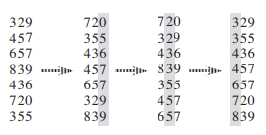

# 4) Tiempo de Ejecucion 


## 4.1) Counting Sort

El tiempo de ejecución del Counting Sort en promedio va a ser de θ(n) ya que para los ciclos for de las lineas 2 - 3, 4 - 5, 7 - 8, 10 - 12 todos ellos al ser de ejecucion lineal tienen un tiempo de ejecucion O(n) pero como siempre tienen que ejecutarse minimo una vez pasa a ser un general de θ(n) para todos los ciclos for, de modo tal que para el general de los casos el tiempo de ejecucion sera θ(n + k) pero cuando k = 0 entonces el tiempo de ejecucion sera θ(n)

## 4.2) Radix Sort

*El ordenamiento radix opera en un tiempo de O(n), donde n es el numero de claves.*
*Los Casos Peor y Mejor son también de tiempo lineal O(n) ya que CountingSort no compara entonces da lo mismo la ordenación que ya tenga el arreglo, hace todas las operaciones de igual manera, solo que ahora repetidas d veces por el FOR de afuera de RadixSort.*

*Dados n números en los cuales cada digito puede tomar k posibles valores, Radix sort ordena correctamente los n números en O(d(n+k)), si d es constante y k =O(n).*

# 5) Experimentos

## 5.1) Experimento 1

In [8]:
def bucketSort(alist):
    largest = max(alist)
    length = len(alist)
    size = largest/length
 
    buckets = [[] for _ in range(length)]
    for i in range(length):
        j = int(alist[i]/size)
        if j != length:
            buckets[j].append(alist[i])
        else:
            buckets[length - 1].append(alist[i])
 
    for i in range(length):
        insertionSort(buckets[i])
 
    result = []
    for i in range(length):
        result = result + buckets[i]
 
    return result

In [9]:
def insertionSort(b):
    for i in range(1, len(b)):
        up = b[i]
        j = i - 1
        while j >= 0 and b[j] > up: 
            b[j + 1] = b[j]
            j -= 1
        b[j + 1] = up     
    return b 

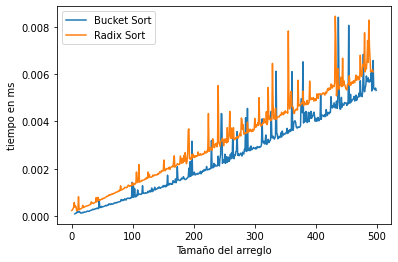

In [53]:
import matplotlib.pyplot as plt
import random
import datetime
from timeit import repeat

x=[]; y=[]; z=[]
pasada = 0

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

 
  t = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a})", repeat=1, number=10)
  h = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  z.append(h)

plt.plot(x,y,z)
plt.legend(["Bucket Sort","Radix Sort"])
plt.xlabel('Tamaño del arreglo')
plt.ylabel('tiempo en ms')
plt.show()

La comparación entre el bucket sort y el radix sort muestra que ambos algoritmos tienen un tiempo de ejecucion muy similar, ademas de un comportamiento similar, no obstante la ejecución del bucket sort termina siendo mas rapida en este caso por lo que podemos concluir según esta experimentación es que el bicket en terminos de velocidad termina siendo mejor. 

## 5.2) Experimento 2

In [38]:
def heapify(arr, N, i):
    largest = i  
    l = 2 * i + 1     
    r = 2 * i + 2   

    if l < N and arr[largest] < arr[l]:
        largest = l

    if r < N and arr[largest] < arr[r]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  

        heapify(arr, N, largest)

def heapSort(arr):
    N = len(arr)

    for i in range(N//2 - 1, -1, -1):
        heapify(arr, N, i)

    for i in range(N-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  
        heapify(arr, i, 0)

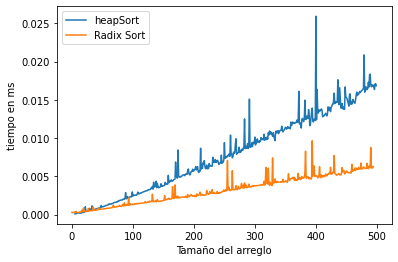

In [55]:
import matplotlib.pyplot as plt
import random
import datetime
from timeit import repeat

x=[]; y=[]; z=[]
pasada = 0

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

 
  t = repeat(setup="from __main__ import heapSort", stmt=f"heapSort({a})", repeat=1, number=10)
  h = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  z.append(h)

plt.plot(x,y,z)
plt.legend(["heapSort","Radix Sort"])
plt.xlabel('Tamaño del arreglo')
plt.ylabel('tiempo en ms')
plt.show()

Haciendo otra comparativa de tiempos de ejecución podemos observar una clara diferencia entre el heapsort y el radix sort, dando una clara ventaja en terminos de velocidad al radix sort, por lo que facilmente podemos concluir que el radix sort es mucho mas veloz que el heap sort.